# Natural Langauge Processing Toturial

In [5]:
import pandas as pd
import numpy as np
data_source='Tweets.csv'
tweets = pd.read_csv(data_source)

In [6]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

NameError: name 'plt' is not defined

<AxesSubplot:ylabel='airline'>

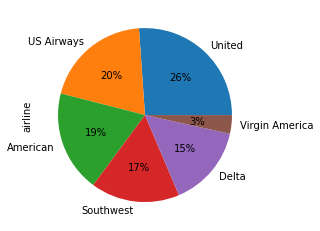

In [8]:
tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:ylabel='airline_sentiment'>

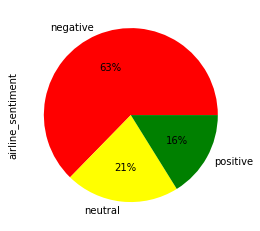

In [9]:
tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

<AxesSubplot:xlabel='airline'>

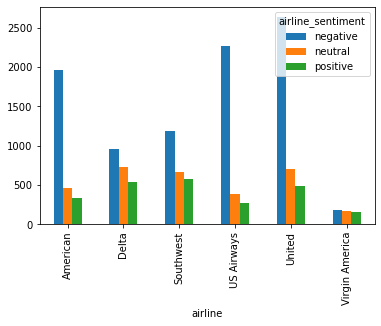

In [10]:
airline_sentiment = tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

In [11]:
import seaborn as sns

Finally, let's use the Seaborn library to view the average confidence level for the tweets belonging to three sentiment categories. Execute the following script:

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

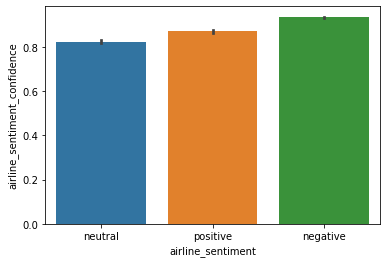

In [12]:
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=tweets)

From the output, you can see that the confidence level for negative tweets is higher compared to positive and neutral tweets.

Enough of the exploratory data analysis, our next step is to perform some preprocessing on the data and then convert the numeric data into text data as shown below.

## Data Cleaning

Tweets contain many slang words and punctuation marks. We need to clean our tweets before they can be used for training the machine learning model. However, before cleaning the tweets, let's divide our dataset into feature and label sets.

In [22]:
features =tweets.iloc[:, 10].values
labels =tweets.iloc[:, 1].values
pdffd=pd.DataFrame(features)

In [23]:
labels

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
labels=LE.fit_transform(labels)
labels

array([1, 2, 1, ..., 1, 0, 1])

In [26]:
import re

processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
    

In [27]:
import pandas as pd
import numpy as np
from keras import layers
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Dense, Flatten

In [28]:
# X_train, X_test, y_train, y_test = train_test_split(processed_features ,labels , test_size = 0.2, random_state = 1)

In [29]:
# def remove_stop_words(text):
#     text = word_tokenize(text.lower())
#     stop_words = set(stopwords.words('english'))
#     text = [word for word in text if word.isalpha() and not word in stop_words]
#     return ' '.join(text)

In [30]:
# processed_features = list(map(remove_stop_words, processed_features))

In [31]:
# X_train=np.array(X_train)
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_train)
# X_train_sequences = tokenizer.texts_to_sequences(X_train)

# X_test=np.array(X_test)
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_test)
# X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [32]:
processed_features=np.array(processed_features)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(processed_features)
sequences = tokenizer.texts_to_sequences(processed_features)

In [33]:
tokenizer.word_index

{'to': 1,
 'the': 2,
 'you': 3,
 'united': 4,
 'for': 5,
 'flight': 6,
 'on': 7,
 'and': 8,
 'my': 9,
 'usairways': 10,
 'americanair': 11,
 'is': 12,
 'in': 13,
 'southwestair': 14,
 'it': 15,
 'jetblue': 16,
 'of': 17,
 'me': 18,
 'your': 19,
 'that': 20,
 'can': 21,
 'have': 22,
 'was': 23,
 'not': 24,
 'with': 25,
 'no': 26,
 'at': 27,
 'this': 28,
 'get': 29,
 'we': 30,
 'but': 31,
 'co': 32,
 'be': 33,
 'from': 34,
 'http': 35,
 'are': 36,
 'thanks': 37,
 'cancelled': 38,
 'now': 39,
 'an': 40,
 'just': 41,
 'service': 42,
 'do': 43,
 'so': 44,
 '2': 45,
 'help': 46,
 'been': 47,
 'what': 48,
 'time': 49,
 'will': 50,
 'they': 51,
 'customer': 52,
 'up': 53,
 'out': 54,
 'm': 55,
 'our': 56,
 'amp': 57,
 'hours': 58,
 'us': 59,
 'all': 60,
 'when': 61,
 'how': 62,
 'flights': 63,
 'hold': 64,
 'there': 65,
 'plane': 66,
 'if': 67,
 'why': 68,
 'thank': 69,
 'still': 70,
 'one': 71,
 'please': 72,
 'would': 73,
 'need': 74,
 'delayed': 75,
 'back': 76,
 'virginamerica': 77,
 'gate

In [34]:

#documents = list(map(remove_stop_words, documents))
 
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(documents)
# tokenizer.texts_to_sequences(documents)


In [35]:
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences= pad_sequences(sequences, maxlen=max_sequence_length)


In [36]:
max_sequence_length 

33

In [37]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences ,labels , test_size = 0.2, random_state = 1)

In [38]:
model=Sequential()

In [39]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 10
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))

In [40]:
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 33, 10)            150850    
                                                                 
 flatten (Flatten)           (None, 330)               0         
                                                                 
 dense (Dense)               (None, 64)                21184     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 172,229
Trainable params: 172,229
Non-trainable params: 0
_________________________________________________________________


In [43]:
import time
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
start_time = time.time()
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])
end_time = time.time()
training_time = end_time - start_time
print('Training time: {:.2f} seconds'.format(training_time))

Epoch 1/50
183/183 [==============================] - 1s 2ms/step - loss: 0.8174 - accuracy: 0.6469 - val_loss: 0.6898 - val_accuracy: 0.6817
Epoch 2/50
183/183 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7728 - val_loss: 0.5872 - val_accuracy: 0.7579
Epoch 3/50
183/183 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8678 - val_loss: 0.5658 - val_accuracy: 0.7790
Epoch 4/50
183/183 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.9305 - val_loss: 0.6174 - val_accuracy: 0.7773
Epoch 5/50
183/183 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.9650 - val_loss: 0.6759 - val_accuracy: 0.7715
Training time: 2.21 seconds


In [44]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


92/92 [==============================] - 0s 783us/step - loss: 0.5658 - accuracy: 0.7790
Test loss: 0.565765917301178
Test accuracy: 0.7790300250053406


In [45]:
predictions=model.predict(X_test)
predictions[0].argmax

def checker(predict):
    if predict.argmax()==2:
        return 'Positive'
    elif predict.argmax()==1:
        return 'Neutral'
    elif predict.argmax()==0:
        return 'Negative'
Predicted_Answer=checker(predictions[6])
True_Answer=checker(y_test[6])
print(Predicted_Answer)
print(True_Answer)

92/92 [==============================] - 0s 725us/step
Neutral
Negative


In [46]:
my_tweet=[' American Airline is really horrible!']
my_tweet_seq = tokenizer.texts_to_sequences(my_tweet)
my_tweet_pad = pad_sequences(my_tweet_seq, maxlen=max_sequence_length)

custom_prediction=model.predict(my_tweet_pad)


1/1 [==============================] - 0s 15ms/step


In [47]:
Predicted=checker(custom_prediction)
print(Predicted)

Negative


In [213]:
my_tweet=['']
my_tweet_seq = tokenizer.texts_to_sequences(my_tweet)
my_tweet_pad = pad_sequences(my_tweet_seq, maxlen=max_sequence_length)

custom_prediction=model.predict(my_tweet_pad)
Predicted=checker(custom_prediction)
print(Predicted)

1/1 [==============================] - 0s 17ms/step
Neutral


In [214]:
model.save('Majd_detection.h5')

# Literature review

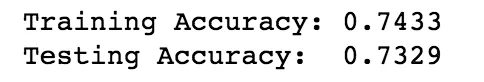

# My Algorithm 

### Training accuracy: 0.967
### Test accuracy: 0.7978

https://medium.com/@francesca_lim/twitter-u-s-airline-sentiment-analysis-using-keras-and-rnns-1956f42294ef